<a href="https://colab.research.google.com/github/amey-joshi/am/blob/master/fdtd/em_simulation_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 10 14:23:02 2020

@author: ajoshi
"""

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
ddx = 0.01        # Cell size.
c = 3e8           # Speed of light in vacuum.
dt = ddx / 2*c    # Time step size.
epsz = 8.854e-12  # Permittivity of free space.
t0 = 20           # Mean magnitude of the pulse.
spread = 6        # Spread of the pulse.


In [ ]:
ie =  60
je =  60
ic = ie // 2
jc =  je // 2
ez =  np.zeros((ie,  je))
dz =  np.zeros((ie,  je))
hx =  np.zeros((ie,  je))
hy =  np.zeros((ie,  je))
gaz = np.ones((ie, je))
nsteps = 50

# Dictionary to track data at various times.
plotting_points = [
  {'label': 'a', 'num_steps': 20, 'data_to_plot': None},
  {'label': 'b', 'num_steps': 30, 'data_to_plot': None},
  {'label': 'c', 'num_steps': 40, 'data_to_plot': None},
  {'label': 'd', 'num_steps': 50, 'data_to_plot': None},
]

In [ ]:
def compute_fields(time_step):
  for j in range(1, je):
    for i in range(1, ie):
      dz[i, j] = dz[i, j] + 0.5 * (hy[i, j] - hy[i - 1, j] - hx[i, j] + hx[i, j - 1])

  dz[ic, jc] = np.exp(-0.5 * ((t0 - time_step) / spread) ** 2)

  for j in range(1, je):
    for i in range(1, ie):
      ez[i, j] = gaz[i, j] * dz[i, j]
            
  for j in range(je - 1):
    for i in range(ie - 1):
      hx[i, j] = hx[i, j] + 0.5 * (ez[i, j] - ez[i, j + 1])

  for j in range(je - 1):
    for i in range(ie - 1):
      hy[i, j] = hy[i, j] + 0.5 * (ez[i + 1, j] - ez[i, j])

  for plotting_point in plotting_points:
    if time_step == plotting_point['num_steps']:
      plotting_point['data_to_plot'] = np.copy(ez)

In [ ]:
# Main FDTD Loop
for time_step in range(1, nsteps + 1):
  compute_fields(time_step)

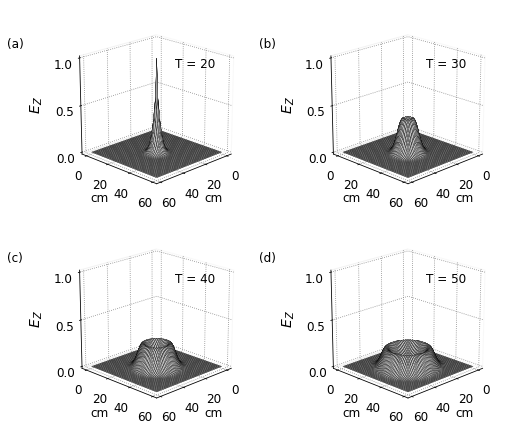

In [ ]:
# Plot Fig. 3.2
plt.rcParams['font.size'] = 12
plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.linestyle'] = 'dotted'
fig = plt.figure(figsize=(8, 7))
X, Y = np.meshgrid(range(je), range(ie))

def plot_e_field(ax, data, timestep, label):
    """3d Plot of E field at a single time step"""
    ax.set_zlim(0, 1)
    ax.view_init(elev=20., azim=45)
    ax.plot_surface(X, Y, data[:, :], rstride=1, cstride=1, 
                    color='white', edgecolor='black', linewidth=.25)
    ax.zaxis.set_rotate_label(False)
    ax.set_zlabel(r' $E_{Z}$', rotation=90, labelpad=10, fontsize=14)
    ax.set_zticks([0, 0.5, 1])
    ax.set_xlabel('cm')
    ax.set_ylabel('cm')
    ax.set_xticks(np.arange(0, 61, step=20))
    ax.set_yticks(np.arange(0, 61, step=20))
    ax.text2D(0.6, 0.7, f"T = {timestep}", transform=ax.transAxes)

    ax.xaxis.pane.fill = ax.yaxis.pane.fill = ax.zaxis.pane.fill = False
    plt.gca().patch.set_facecolor('white')
    ax.text2D(-0.2, 0.8, "({})".format(label), transform=ax.transAxes)
    ax.dist = 11

for subplot_num, plotting_point in enumerate(plotting_points):
    ax = fig.add_subplot(2, 2, subplot_num + 1, projection='3d')
    plot_e_field(ax, plotting_point['data_to_plot'],
    plotting_point['num_steps'],
    plotting_point['label'])
    plt.subplots_adjust(bottom=0.05, left=0.10, hspace=0.05)

plt.show()